# Model Testing and Analysis

This notebook contains scripts for testing different object detection models and analyzing their performance results.

## Part 1: Model Testing

This section runs all model tests sequentially and saves results to CSV.

### Import Libraries for Testing

In [1]:
import subprocess
import sys
import os
import time

def run_script(script_name):
    """Execute a Python script and handle any errors"""
    print(f"\n{'='*50}")
    print(f"Running {script_name}...")
    print(f"{'='*50}")
    
    try:
        result = subprocess.run([sys.executable, script_name], 
                              capture_output=False, 
                              text=True, 
                              check=True)
        print(f"✅ {script_name} completed successfully!")
        return True
        
    except subprocess.CalledProcessError as e:
        print(f"❌ Error running {script_name}: {e}")
        print(f"Return code: {e.returncode}")
        return False
    except FileNotFoundError:
        print(f"❌ Script {script_name} not found!")
        return False

### Run All Model Tests

Execute this cell to run all tests and generate the results.csv file:

In [2]:
def run_all_tests():
    """Run all tests in sequence"""
    print("Starting comprehensive model testing...")
    print("This will test all models and save results to results.csv")
    
    # List of scripts to run
    scripts = [
        "test_yolov8n.py",
        "test_yolo11n.py", 
        "test_yolo11s.py",
        "test_ssdlite.py",
        "test_ssd300.py"
    ]
    
    # Check that all files exist
    missing_files = []
    for script in scripts:
        if not os.path.exists(script):
            missing_files.append(script)
    
    if missing_files:
        print(f"❌ Missing files: {missing_files}")
        print("Please make sure all test scripts are in the current directory.")
        return False
    
    # Run all tests
    successful_tests = 0
    failed_tests = 0
    
    start_time = time.time()
    
    for script in scripts:
        if run_script(script):
            successful_tests += 1
        else:
            failed_tests += 1
        
        # Small pause between tests
        time.sleep(2)
    
    end_time = time.time()
    total_time = end_time - start_time
    
    # Final results
    print(f"\n{'='*60}")
    print("FINAL RESULTS")
    print(f"{'='*60}")
    print(f"Total tests run: {len(scripts)}")
    print(f"Successful: {successful_tests}")
    print(f"Failed: {failed_tests}")
    print(f"Total time: {total_time:.2f} seconds")
    
    if os.path.exists('results.csv'):
        print(f"✅ Results saved to results.csv")
        print("You can open results.csv to view all the benchmark results.")
        return True
    else:
        print("❌ No results.csv file found!")
        return False

# Run the tests
run_all_tests()

Starting comprehensive model testing...
This will test all models and save results to results.csv

Running test_yolov8n.py...
Testing yolov8n...
Warming up...
Running inference tests...
Results for yolov8n:
  modello: yolov8n
  num_parametri: 3157200
  dimensione_mb: 12.08
  gflops: 8.7
  inference_speed_ms: 154.5
  fps: 6.47
  memoria_utilizzata_mb: 136.35
  immagini_testate: 50
  cpu_count: 8
  ram_totale_gb: 15.51
  cpu_freq_ghz: 3.4
Results saved to results.csv
✅ test_yolov8n.py completed successfully!

Running test_yolo11n.py...
Testing yolo11n...
Warming up...
Running inference tests...
Results for yolo11n:
  modello: yolo11n
  num_parametri: 2624080
  dimensione_mb: 10.07
  gflops: 6.4
  inference_speed_ms: 156.81
  fps: 6.38
  memoria_utilizzata_mb: 141.56
  immagini_testate: 50
  cpu_count: 8
  ram_totale_gb: 15.51
  cpu_freq_ghz: 3.4
Results saved to results.csv
✅ test_yolo11n.py completed successfully!

Running test_yolo11s.py...
Testing yolo11s...
Warming up...
Running infe

True

## Part 2: Results Analysis and Visualization

This section analyzes the test results and creates visualizations step by step.

### Import Analysis Libraries and Load Data

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Define colors
colors = {
    "fps": "#363636",
    "size": "#406c80",
    "time": "#cf8532",
    "gflops": "#c94c4c",
    "params": "#6B9968",
    "memory": "#786797"
}

# Configuration for high-quality plots
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans']
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# Load the results data
if not os.path.exists('results-rp.csv'):
    print("❌ File results.csv not found!")
    print("Run the testing section first")
    df = None
else:
    df = pd.read_csv('results-rp.csv')
    print("✅ Results loaded successfully!")
    print(f"Models tested: {len(df)}")
    print(f"Columns: {list(df.columns)}")

✅ Results loaded successfully!
Models tested: 5
Columns: ['modello', 'num_parametri', 'dimensione_mb', 'gflops', 'inference_speed_ms', 'fps', 'memoria_utilizzata_mb', 'immagini_testate', 'cpu_count', 'ram_totale_gb', 'cpu_freq_ghz']


### Display Basic Results Summary

In [59]:
if df is not None:
    print("📊 Model Performance Test Analysis")
    print("="*60)
    
    # Show basic statistics
    print("\n📋 RESULTS SUMMARY:")
    print(f"Models tested: {len(df)}")
    print(f"Images tested per model: {df['immagini_testate'].iloc[0]}")
    
    # Create comparison table
    comparison_cols = ['modello', 'num_parametri', 'dimensione_mb', 'gflops', 
                      'inference_speed_ms', 'fps', 'memoria_utilizzata_mb']
    
    if all(col in df.columns for col in comparison_cols):
        comparison_df = df[comparison_cols].copy()
        
        # Format numbers for better readability
        comparison_df['Parameters (M)'] = (comparison_df['num_parametri'] / 1e6).round(2)
        comparison_df['Size (MB)'] = comparison_df['dimensione_mb'].round(1)
        comparison_df['GFLOPS'] = comparison_df['gflops'].round(1)
        comparison_df['Time (ms)'] = comparison_df['inference_speed_ms'].round(1)
        comparison_df['FPS'] = comparison_df['fps'].round(1)
        comparison_df['RAM (MB)'] = comparison_df['memoria_utilizzata_mb'].round(1)
        
        # Show clean table
        clean_df = comparison_df[['modello', 'Parameters (M)', 'Size (MB)', 
                                 'GFLOPS', 'Time (ms)', 'FPS', 'RAM (MB)']]
        print("\n📊 MODEL COMPARISON:")
        print(clean_df.to_string(index=False))
        
        # Find the best for each metric
        print("\n🏆 BEST PERFORMANCES:")
        best_fps = df.loc[df['fps'].idxmax()]
        print(f"⚡ Fastest (FPS): {best_fps['modello']} ({best_fps['fps']:.1f} FPS)")
        
        lightest = df.loc[df['dimensione_mb'].idxmin()]
        print(f"📦 Lightest: {lightest['modello']} ({lightest['dimensione_mb']:.1f} MB)")
        
        least_params = df.loc[df['num_parametri'].idxmin()]
        print(f"🔢 Fewest parameters: {least_params['modello']} ({least_params['num_parametri']/1e6:.1f}M)")
        
        least_memory = df.loc[df['memoria_utilizzata_mb'].idxmin()]
        print(f"🧠 Least memory: {least_memory['modello']} ({least_memory['memoria_utilizzata_mb']:.1f} MB)")
        
        if df['gflops'].max() > 0:
            least_gflops = df.loc[df['gflops'].idxmin()]
            print(f"⚙️ Lowest GFLOPS: {least_gflops['modello']} ({least_gflops['gflops']:.1f} GFLOPS)")
        
        # System info
        if 'cpu_count' in df.columns:
            print(f"\n🖥️ SYSTEM INFO:")
            print(f"CPU cores: {df['cpu_count'].iloc[0]}")
            print(f"CPU frequency: {df['cpu_freq_ghz'].iloc[0]} GHz")
            print(f"Total RAM: {df['ram_totale_gb'].iloc[0]:.1f} GB")

📊 Model Performance Test Analysis

📋 RESULTS SUMMARY:
Models tested: 5
Images tested per model: 50

📊 MODEL COMPARISON:
            modello  Parameters (M)  Size (MB)  GFLOPS  Time (ms)  FPS  RAM (MB)
            yolov8n            3.16       12.1     8.7      295.6  3.4      41.0
            yolo11n            2.62       10.1     6.4      335.8  3.0      58.4
            yolo11s            9.46       36.2    21.5      709.8  1.4      35.8
ssd320_mobilenet_v3            3.44       13.2     0.6      197.4  5.1      14.4
       ssd300_vgg16           35.64      136.0    31.0     1162.0  0.9      45.7

🏆 BEST PERFORMANCES:
⚡ Fastest (FPS): ssd320_mobilenet_v3 (5.1 FPS)
📦 Lightest: yolo11n (10.1 MB)
🔢 Fewest parameters: yolo11n (2.6M)
🧠 Least memory: ssd320_mobilenet_v3 (14.4 MB)
⚙️ Lowest GFLOPS: ssd320_mobilenet_v3 (0.6 GFLOPS)

🖥️ SYSTEM INFO:
CPU cores: 4
CPU frequency: 2.4 GHz
Total RAM: 7.9 GB


### Helper Function for Beautiful Bar Charts

In [60]:
def create_beautiful_bar_plot(ax, data, labels, title, ylabel, color, format_string="{:.1f}"):
    """Create a beautiful bar chart"""
    
    # Calculate optimal Y range
    max_val = max(data)
    y_margin = max_val * 0.25  # 25% top margin
    ax.set_ylim(0, max_val + y_margin)
    
    # Create bars with gradient effect
    bars = ax.bar(range(len(data)), data, 
                  color=color, 
                  alpha=0.8, 
                  edgecolor='white', 
                  linewidth=1.2,
                  width=0.7)
    
    # Add gradient effect to bars
    for bar in bars:
        bar.set_alpha(0.9)
    
    # Labels on bars with optimal positioning
    for i, (bar, value) in enumerate(zip(bars, data)):
        height = bar.get_height()
        label_y = height + (y_margin * 0.05)  # Label position above bar
        
        # Format the value
        if format_string == "{:.1f}":
            label_text = f"{value:.1f}"
        elif format_string == "{:,.0f}":
            label_text = f"{value:,.0f}"
        else:
            label_text = format_string.format(value)
        
        ax.text(i, label_y, label_text,
                ha='center', va='bottom',
                fontweight='bold',
                fontsize=9,
                color='#2E2E2E')
    
    # Axis styling
    ax.set_title(title, fontsize=13, fontweight='bold', pad=20, color='#1f1f1f')
    ax.set_ylabel(ylabel, fontsize=11, fontweight='600', color='#4A4A4A')
    ax.set_xlabel('')
    
    # X-axis labels
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=9, color='#4A4A4A')
    
    # Grid for better readability
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, axis='y')
    ax.set_axisbelow(True)
    
    # Background color
    ax.set_facecolor('#fafafa')

### Plot 1: Performance Overview (FPS and Inference Time)

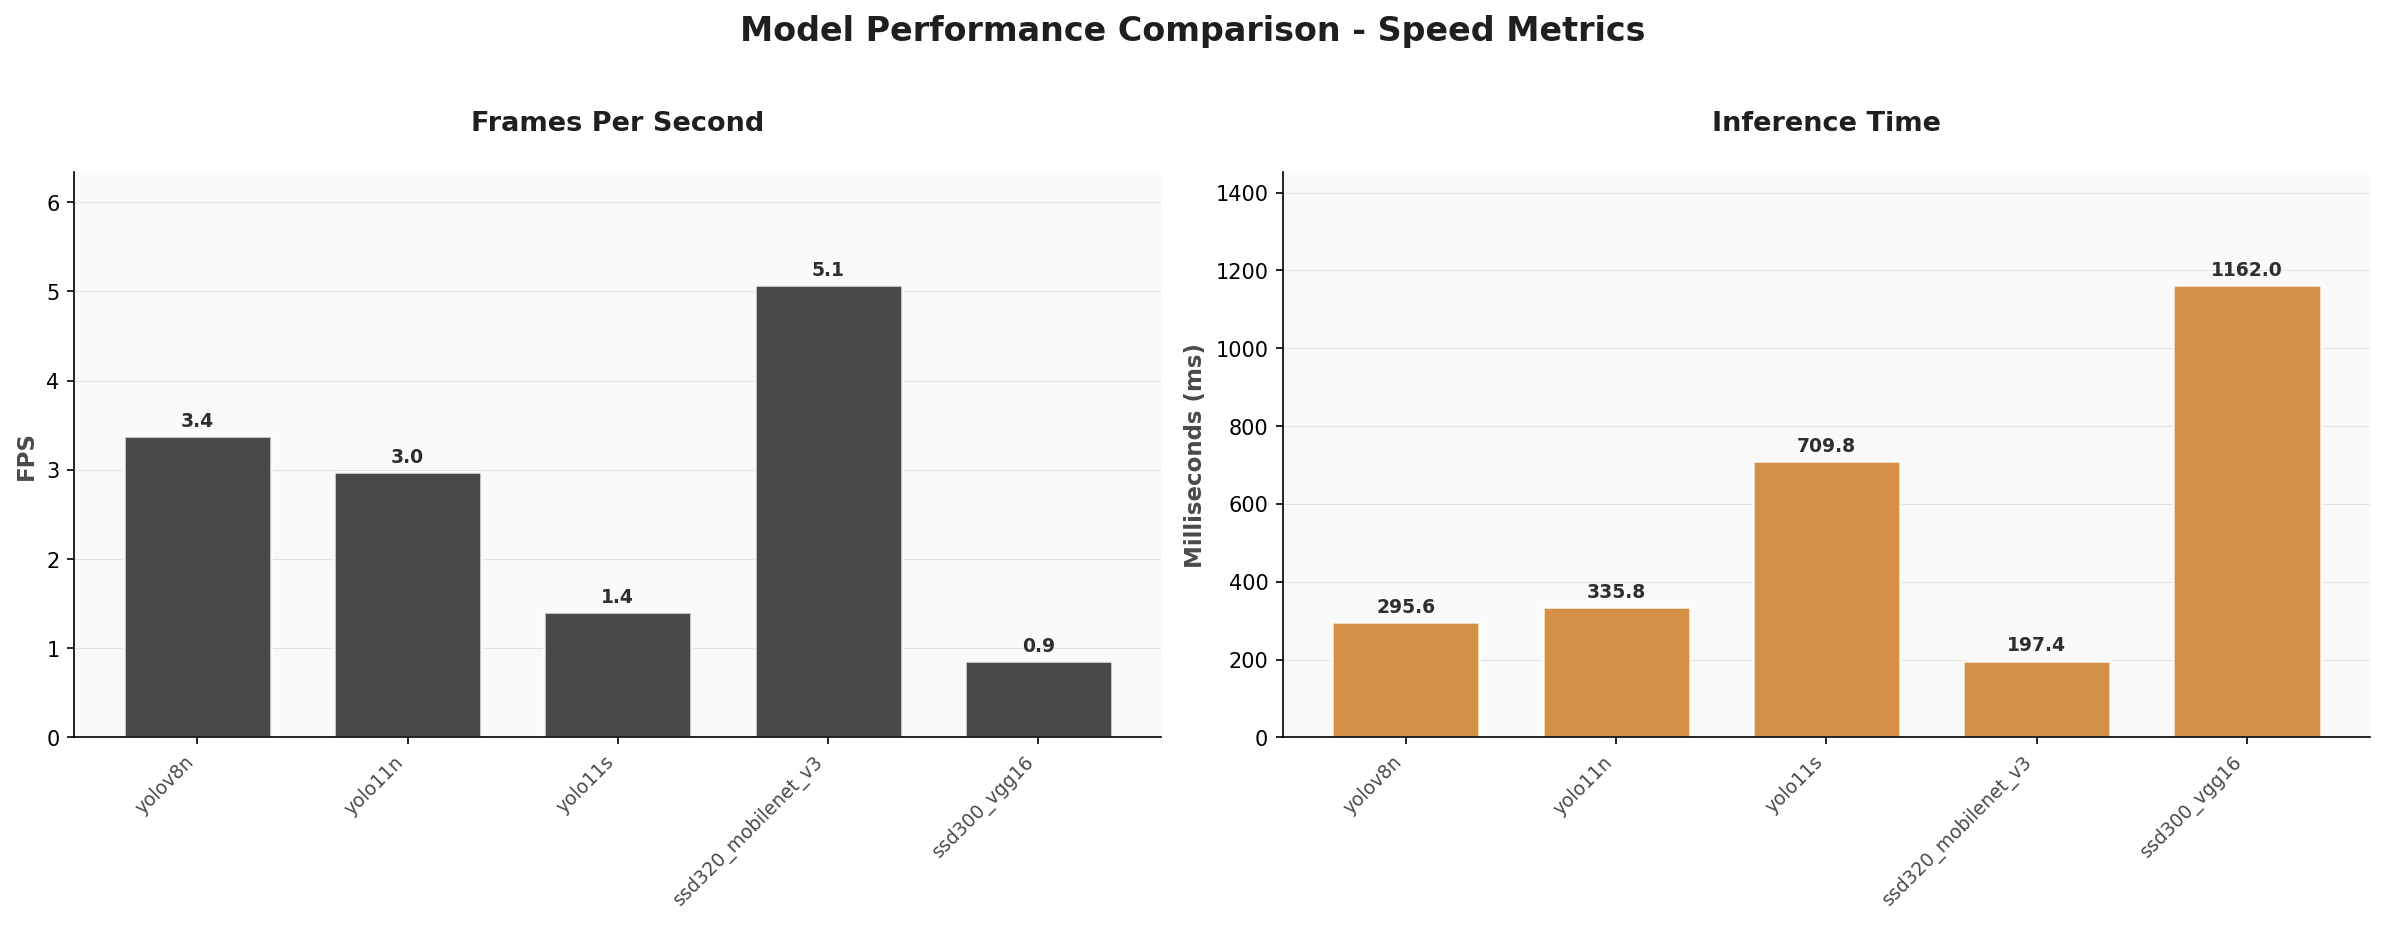

Performance comparison saved as 'model_performance_comparison.png'


<Figure size 960x720 with 0 Axes>

In [ ]:
if df is not None:
    
    # Create performance plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.patch.set_facecolor('white')
    fig.suptitle('Model Performance Comparison - Speed Metrics', 
                 fontsize=16, fontweight='bold', y=1.02, color='#1f1f1f')
    
    # Plot 1: FPS
    create_beautiful_bar_plot(ax1, df['fps'], df['modello'], 
                             'Frames Per Second', 'FPS', 
                             colors['fps'], "{:.1f}")
    
    # Plot 2: Inference time
    create_beautiful_bar_plot(ax2, df['inference_speed_ms'], df['modello'], 
                             'Inference Time', 'Milliseconds (ms)', 
                             colors['time'], "{:.1f}")
    
    plt.tight_layout()
    
    # Save the plot
    plt.savefig('model_performance_comparison.png', dpi=300, bbox_inches='tight',
                facecolor='white', edgecolor='none')
    
    plt.show()
    print("Performance comparison saved as 'model_performance_comparison.png'")

### Plot 2: Model Size and Memory Usage

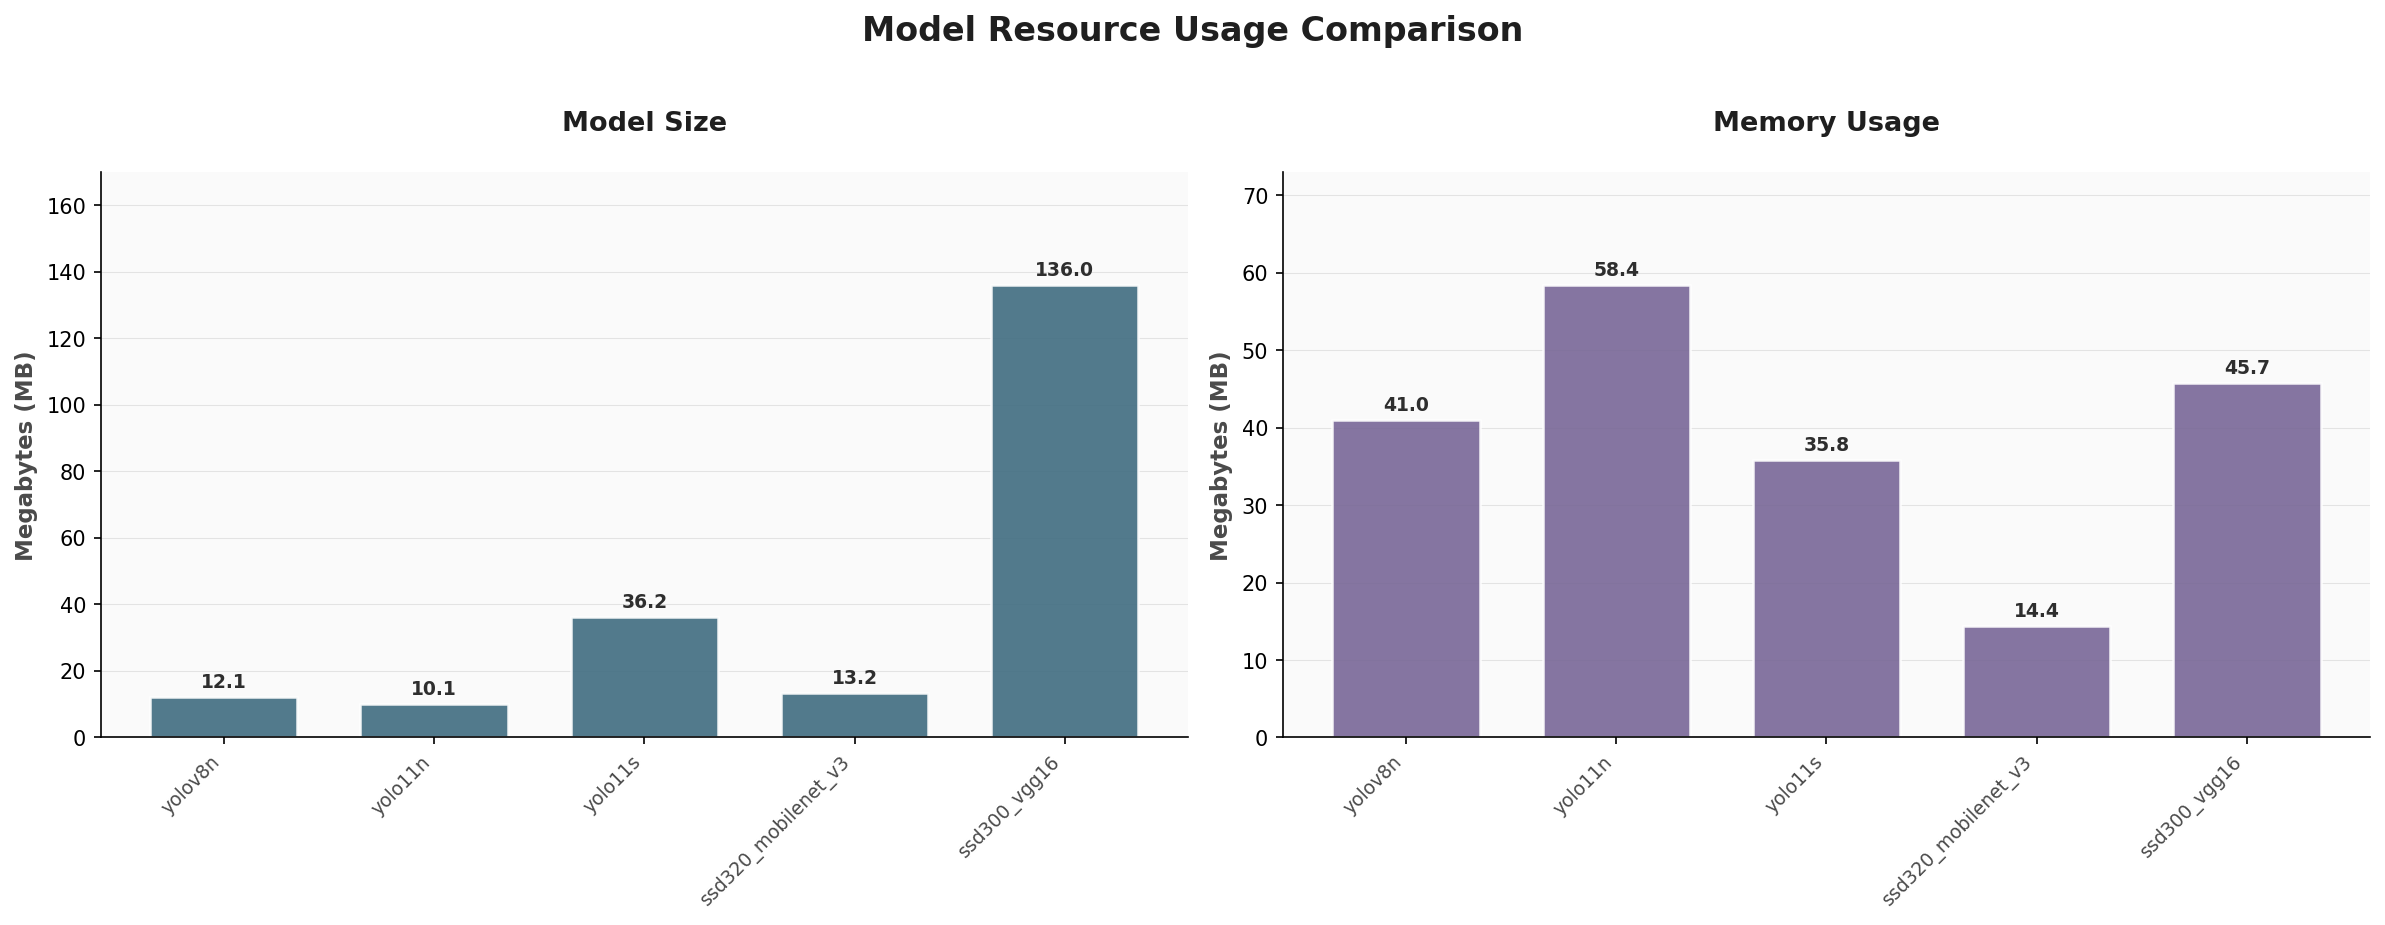

Resource usage comparison saved as 'model_resources_comparison.png'


<Figure size 960x720 with 0 Axes>

In [62]:
if df is not None:
    # Create size and memory plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.patch.set_facecolor('white')
    fig.suptitle('Model Resource Usage Comparison', 
                 fontsize=16, fontweight='bold', y=1.02, color='#1f1f1f')
    
    # Plot 1: Model size
    create_beautiful_bar_plot(ax1, df['dimensione_mb'], df['modello'], 
                             'Model Size', 'Megabytes (MB)', 
                             colors['size'], "{:.1f}")
    
    # Plot 2: Memory usage
    create_beautiful_bar_plot(ax2, df['memoria_utilizzata_mb'], df['modello'], 
                             'Memory Usage', 'Megabytes (MB)', 
                             colors['memory'], "{:.1f}")
    
    plt.tight_layout()
    plt.show()
    
    # Save the plot
    plt.savefig('model_resources_comparison.png', dpi=300, bbox_inches='tight',
                facecolor='white', edgecolor='none')
    print("Resource usage comparison saved as 'model_resources_comparison.png'")

### Plot 3: Model Complexity (Parameters and GFLOPS)

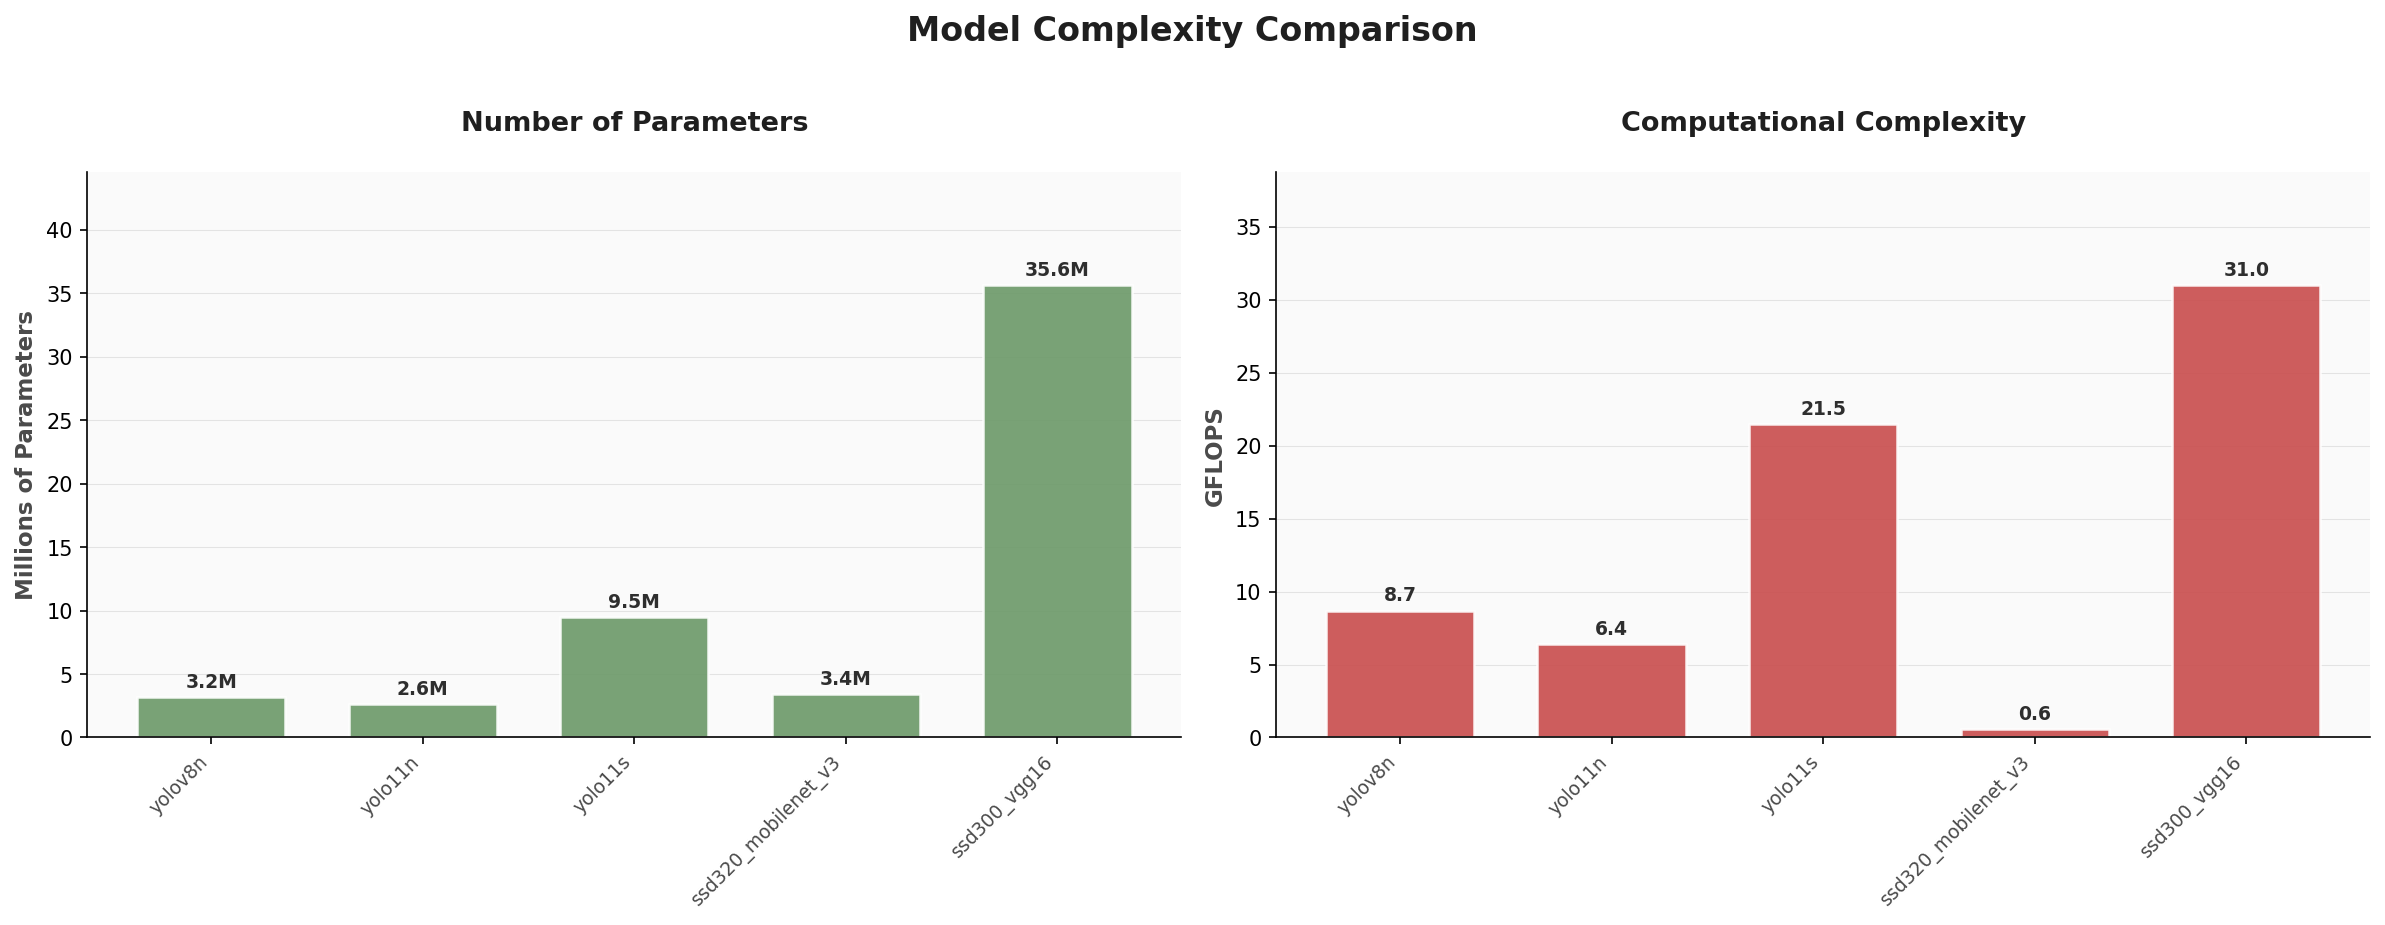

Model complexity comparison saved as 'model_complexity_comparison.png'


<Figure size 960x720 with 0 Axes>

In [ ]:
if df is not None:
    # Create complexity plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.patch.set_facecolor('white')
    fig.suptitle('Model Complexity Comparison', 
                 fontsize=16, fontweight='bold', y=1.02, color='#1f1f1f')
    
    # Plot 1: Parameters
    params_millions = df['num_parametri'] / 1e6
    create_beautiful_bar_plot(ax1, params_millions, df['modello'], 
                             'Number of Parameters', 'Millions of Parameters', 
                             colors['params'], "{:.1f}M")
    
    # Plot 2: GFLOPS (if available)
    if df['gflops'].max() > 0:
        create_beautiful_bar_plot(ax2, df['gflops'], df['modello'], 
                                 'Computational Complexity', 'GFLOPS', 
                                 colors['gflops'], "{:.1f}")
    else:
        ax2.text(0.5, 0.5, 'GFLOPS\nNot Available', 
                ha='center', va='center', fontsize=14, color='#999999',
                transform=ax2.transAxes)
        ax2.set_title('GFLOPS', fontsize=13, fontweight='bold', pad=20)
        ax2.axis('off')
    
    plt.tight_layout()
    
    # Save the plot
    plt.savefig('model_complexity_comparison.png', dpi=300, bbox_inches='tight',
                facecolor='white', edgecolor='none')
    plt.show()
    
    print("Model complexity comparison saved as 'model_complexity_comparison.png'")

### Plot 4: Efficiency Analysis

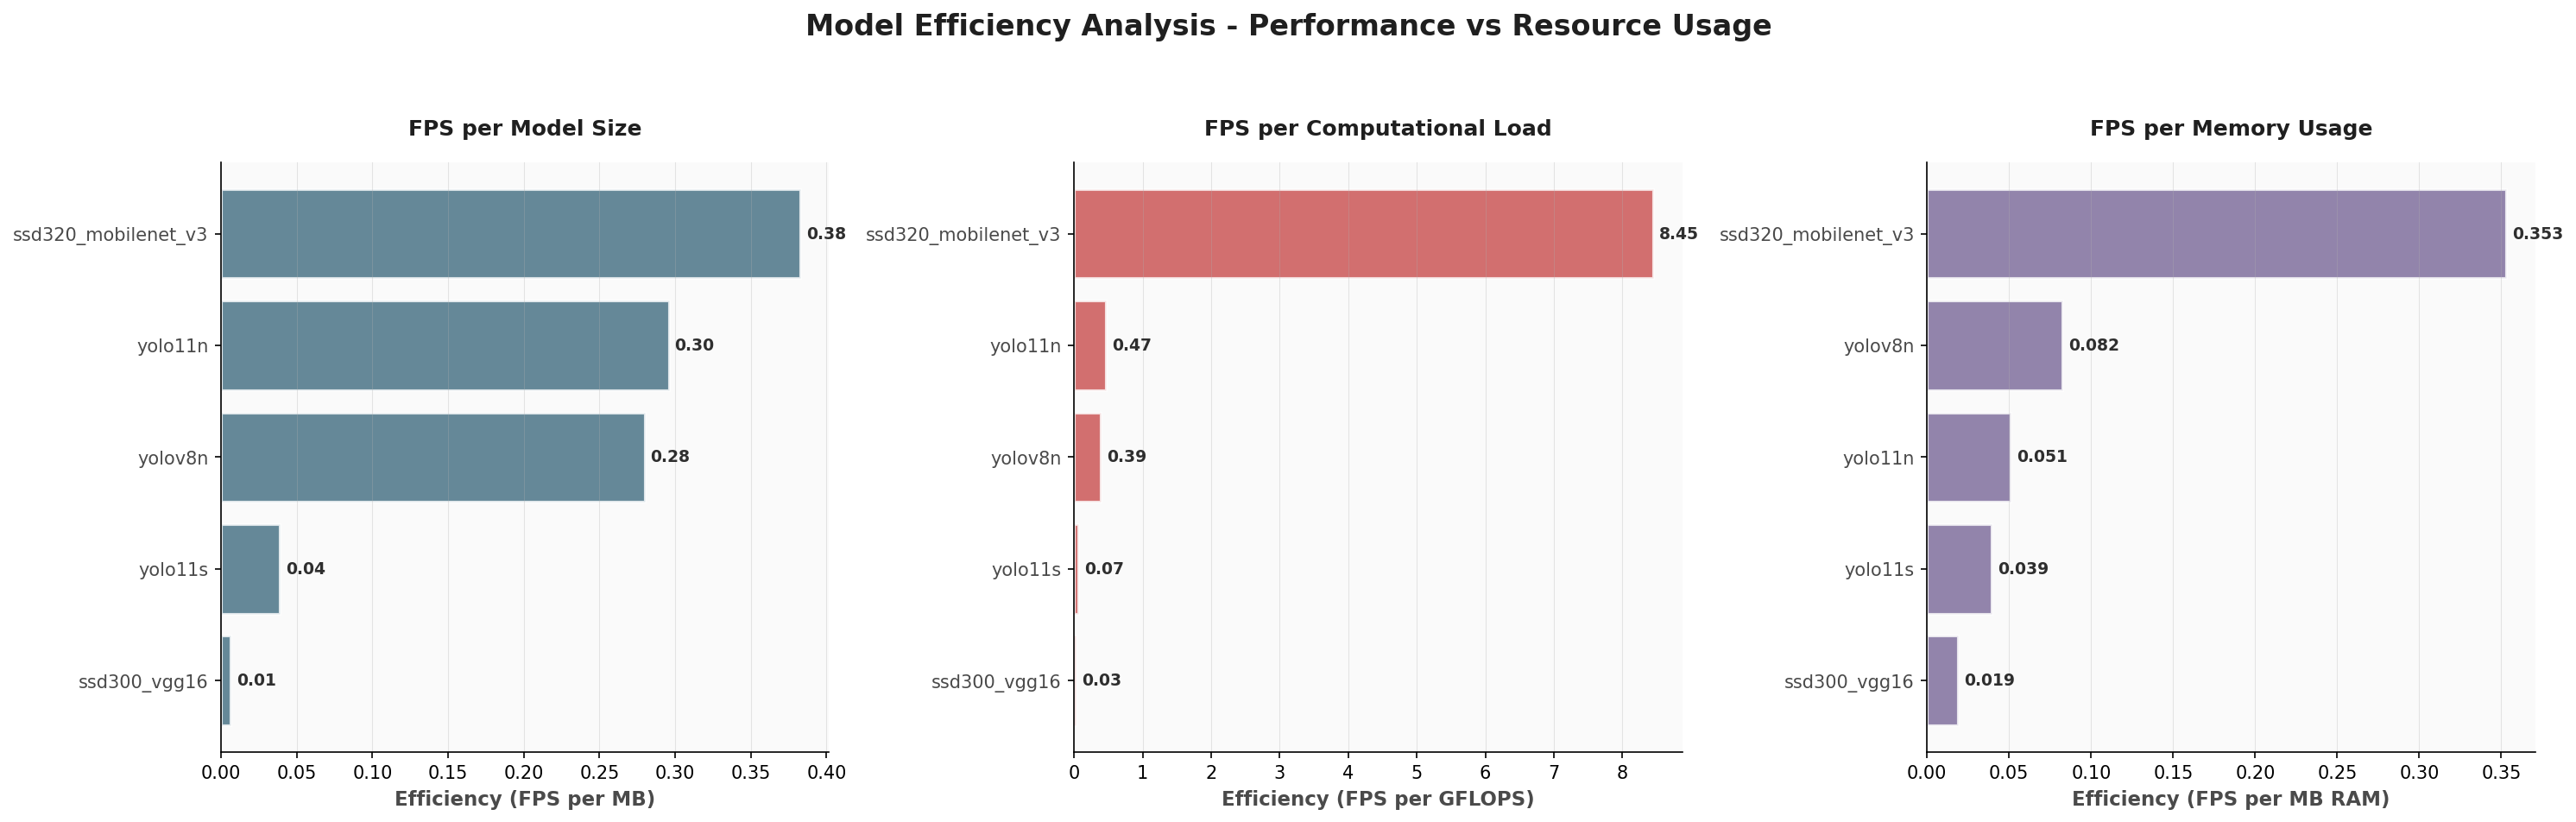

🎯 EFFICIENCY ANALYSIS:


<Figure size 960x720 with 0 Axes>

In [ ]:
if df is not None:
    # Calculate efficiency metrics
    df_eff = df.copy()
    df_eff['efficiency_size'] = df_eff['fps'] / df_eff['dimensione_mb']  # FPS per MB
    df_eff['efficiency_gflops'] = df_eff['fps'] / df_eff['gflops'].replace(0, np.nan)  # FPS per GFLOP
    df_eff['efficiency_memory'] = df_eff['fps'] / df_eff['memoria_utilizzata_mb']  # FPS per MB memory

    # Create figure with 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
    fig.patch.set_facecolor('white')
    fig.suptitle('Model Efficiency Analysis - Performance vs Resource Usage', 
                 fontsize=16, fontweight='bold', y=1.05, color='#1f1f1f')

    # Plot 1: FPS per Model Size (MB)
    df_eff_size = df_eff.sort_values('efficiency_size', ascending=True)
    bars1 = ax1.barh(range(len(df_eff_size)), df_eff_size['efficiency_size'], 
                     color=colors['size'], alpha=0.8, edgecolor='white', linewidth=1.5)
    for i, (bar, efficiency) in enumerate(zip(bars1, df_eff_size['efficiency_size'])):
        width = bar.get_width()
        ax1.text(width + max(df_eff_size['efficiency_size']) * 0.01, i, 
                 f'{efficiency:.2f}', ha='left', va='center', fontweight='bold', fontsize=9, color='#2E2E2E')
    ax1.set_xlabel('Efficiency (FPS per MB)', fontsize=11, fontweight='600', color='#4A4A4A')
    ax1.set_title('FPS per Model Size', fontsize=12, fontweight='bold', pad=15, color='#1f1f1f')
    ax1.set_yticks(range(len(df_eff_size)))
    ax1.set_yticklabels(df_eff_size['modello'], fontsize=10, color='#4A4A4A')
    ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, axis='x')
    ax1.set_facecolor('#fafafa')

    # Plot 2: FPS per GFLOPS (only if GFLOPS available)
    if df['gflops'].max() > 0:
        df_eff_gflops = df_eff.dropna(subset=['efficiency_gflops']).sort_values('efficiency_gflops', ascending=True)
        if len(df_eff_gflops) > 0:
            bars2 = ax2.barh(range(len(df_eff_gflops)), df_eff_gflops['efficiency_gflops'], 
                             color=colors['gflops'], alpha=0.8, edgecolor='white', linewidth=1.5)
            for i, (bar, efficiency) in enumerate(zip(bars2, df_eff_gflops['efficiency_gflops'])):
                width = bar.get_width()
                ax2.text(width + max(df_eff_gflops['efficiency_gflops']) * 0.01, i, 
                         f'{efficiency:.2f}', ha='left', va='center', fontweight='bold', fontsize=9, color='#2E2E2E')
            ax2.set_yticks(range(len(df_eff_gflops)))
            ax2.set_yticklabels(df_eff_gflops['modello'], fontsize=10, color='#4A4A4A')
            ax2.set_facecolor('#fafafa')
    else:
        ax2.text(0.5, 0.5, 'GFLOPS\nNot Available', ha='center', va='center', fontsize=12, color='#999999',
                 transform=ax2.transAxes)
        ax2.axis('off')

    ax2.set_xlabel('Efficiency (FPS per GFLOPS)', fontsize=11, fontweight='600', color='#4A4A4A')
    ax2.set_title('FPS per Computational Load', fontsize=12, fontweight='bold', pad=15, color='#1f1f1f')
    ax2.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, axis='x')

    # Plot 3: FPS per Memory Usage
    df_eff_memory = df_eff.sort_values('efficiency_memory', ascending=True)
    bars3 = ax3.barh(range(len(df_eff_memory)), df_eff_memory['efficiency_memory'], 
                     color=colors['memory'], alpha=0.8, edgecolor='white', linewidth=1.5)
    for i, (bar, efficiency) in enumerate(zip(bars3, df_eff_memory['efficiency_memory'])):
        width = bar.get_width()
        ax3.text(width + max(df_eff_memory['efficiency_memory']) * 0.01, i, 
                 f'{efficiency:.3f}', ha='left', va='center', fontweight='bold', fontsize=9, color='#2E2E2E')
    ax3.set_xlabel('Efficiency (FPS per MB RAM)', fontsize=11, fontweight='600', color='#4A4A4A')
    ax3.set_title('FPS per Memory Usage', fontsize=12, fontweight='bold', pad=15, color='#1f1f1f')
    ax3.set_yticks(range(len(df_eff_memory)))
    ax3.set_yticklabels(df_eff_memory['modello'], fontsize=10, color='#4A4A4A')
    ax3.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, axis='x')
    ax3.set_facecolor('#fafafa')

    plt.tight_layout()

    # Save the plot
    plt.savefig('model_efficiency_comparison.png', dpi=300, bbox_inches='tight',
                facecolor='white', edgecolor='none')
    plt.show()

    print("🎯 EFFICIENCY ANALYSIS:")

### Plot 5: Radar Chart for Multi-dimensional Comparison

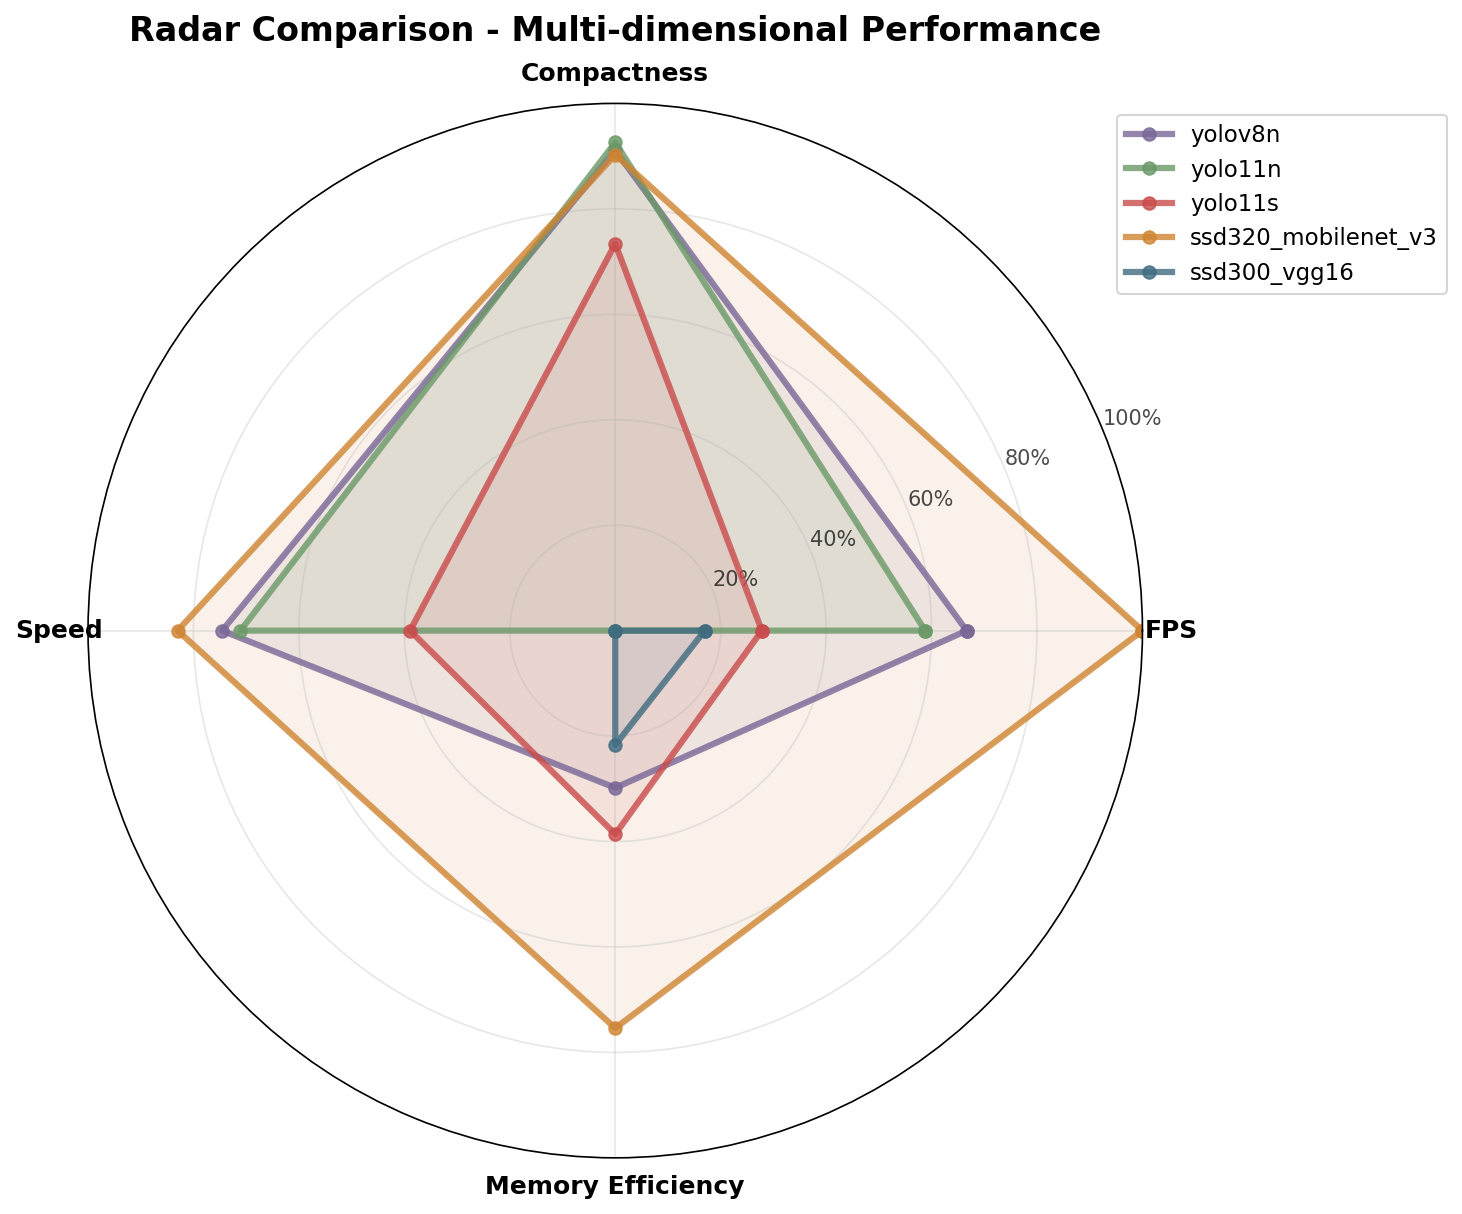

Radar chart saved as 'model_radar_comparison.png'


<Figure size 960x720 with 0 Axes>

In [ ]:
if df is not None and len(df) <= 5:  # Only create radar chart if we have 5 or fewer models
    # Metrics for the radar (normalized)
    metrics = ['FPS', 'Compactness', 'Speed', 'Memory Efficiency']
    
    # Normalize data (higher = better)
    normalized_data = []
    for _, row in df.iterrows():
        fps_norm = row['fps'] / df['fps'].max() * 100
        size_norm = (df['dimensione_mb'].max() - row['dimensione_mb']) / df['dimensione_mb'].max() * 100
        speed_norm = (df['inference_speed_ms'].max() - row['inference_speed_ms']) / df['inference_speed_ms'].max() * 100
        memory_norm = (df['memoria_utilizzata_mb'].max() - row['memoria_utilizzata_mb']) / df['memoria_utilizzata_mb'].max() * 100
        
        normalized_data.append([fps_norm, size_norm, speed_norm, memory_norm])
    
    # Setup radar chart
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    fig.patch.set_facecolor('white')
    
    # Angles for each metric
    angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]  # Close the circle
    
    # Colors for each model
    radar_colors = list(colors.values())[::-1]
    
    # Draw each model
    for i, (_, row) in enumerate(df.iterrows()):
        values = normalized_data[i] + normalized_data[i][:1]  # Close the circle
        ax.plot(angles, values, 'o-', linewidth=3, 
                color=radar_colors[i % len(radar_colors)], alpha=0.8,
                label=row['modello'])
        ax.fill(angles, values, color=radar_colors[i % len(radar_colors)], alpha=0.1)
    
    # Customization
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, fontsize=12, fontweight='600')
    ax.set_ylim(0, 100)
    ax.set_yticks([20, 40, 60, 80, 100])
    ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], fontsize=10, alpha=0.7)
    ax.grid(True, alpha=0.3)
    
    # Title and legend
    plt.title('Radar Comparison - Multi-dimensional Performance', 
              size=16, fontweight='bold', pad=30)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=11)
    
    plt.tight_layout()
    plt.savefig('model_radar_comparison.png', dpi=300, bbox_inches='tight',
                facecolor='white', edgecolor='none')
    plt.show()
    
    print("Radar chart saved as 'model_radar_comparison.png'")
elif df is not None:
    print(f"⚠️ Too many models ({len(df)}) for radar chart. Maximum 5 models supported for readability.")

### Complete Benchmark Overview

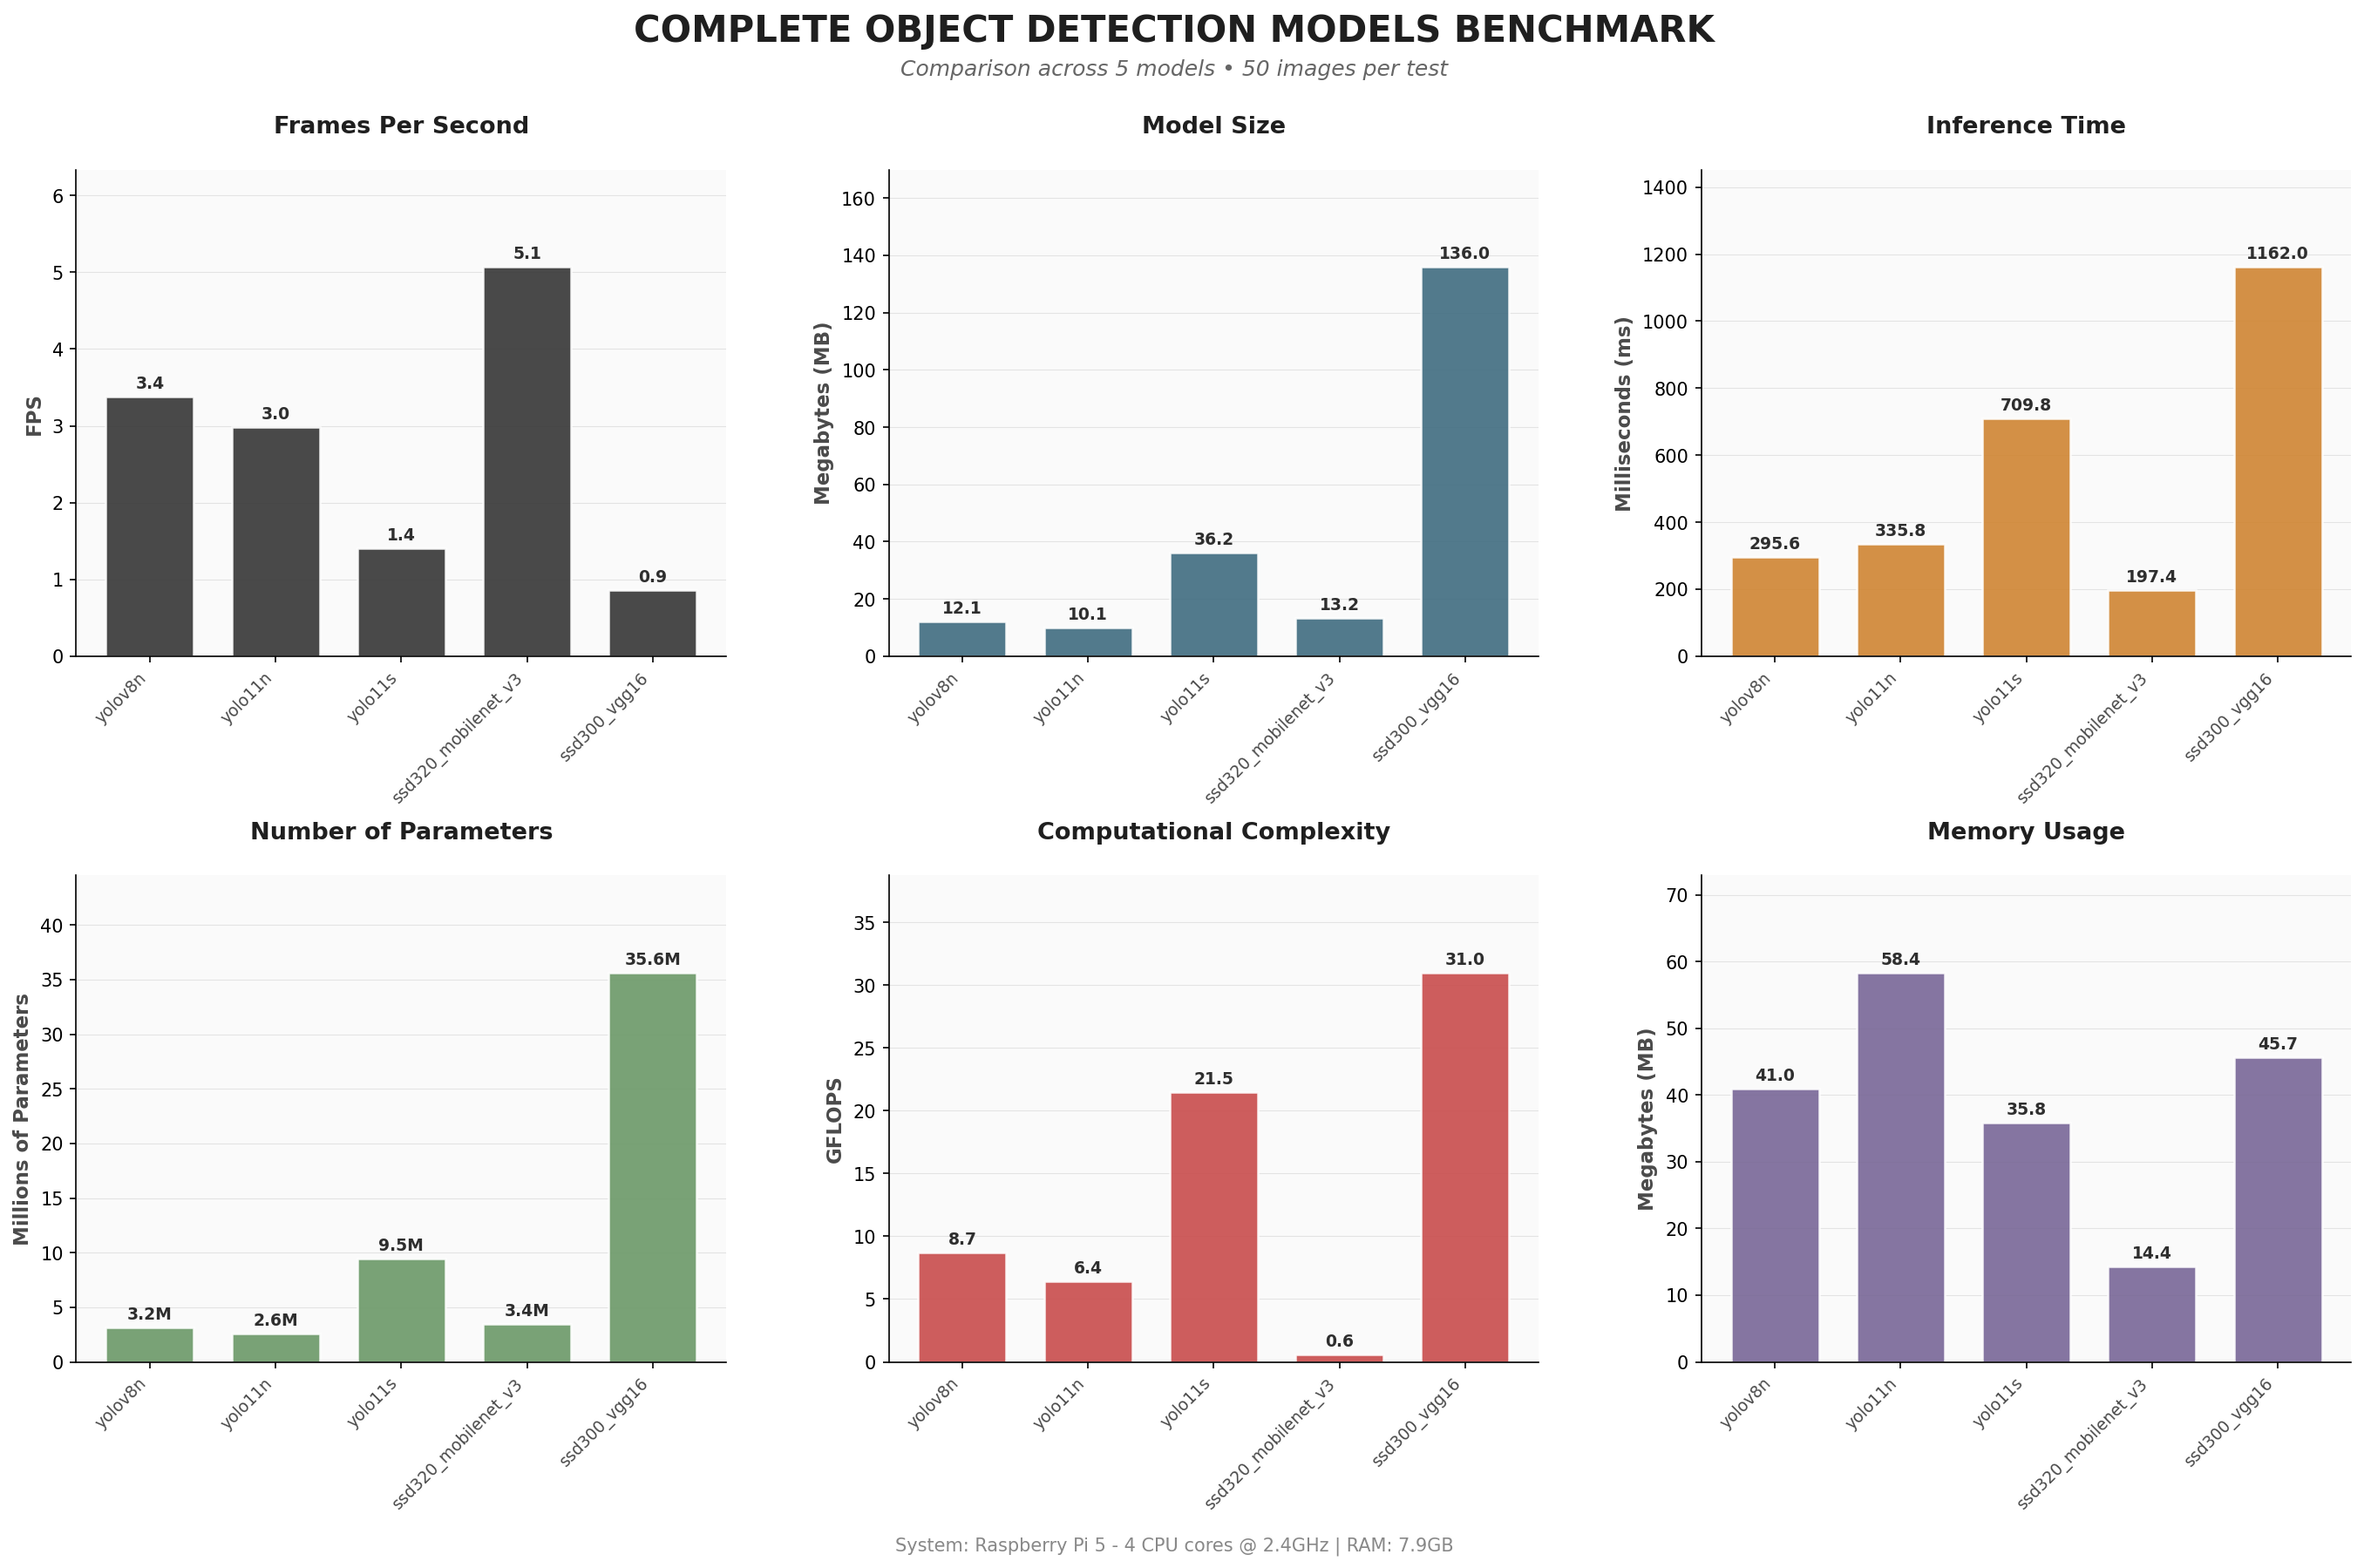

Complete benchmark overview saved as 'model_complete_benchmark.png'
Resolution: 300 DPI for professional printing


In [71]:
if df is not None:
    # Create the complete benchmark overview
    fig = plt.figure(figsize=(20, 12))
    fig.patch.set_facecolor('white')
    
    # Main title
    fig.suptitle('COMPLETE OBJECT DETECTION MODELS BENCHMARK', 
                 fontsize=20, fontweight='bold', y=0.98, color='#1f1f1f')
    
    # Subtitle
    num_models = len(df)
    num_images = df['immagini_testate'].iloc[0] if 'immagini_testate' in df.columns else 20
    fig.text(0.5, 0.94, f'Comparison across {num_models} models • {num_images} images per test', 
             ha='center', fontsize=12, color='#666666', style='italic')
    
    # 2x3 grid layout
    gs = fig.add_gridspec(2, 3, hspace=0.45, wspace=0.25, 
                          left=0.08, right=0.95, top=0.88, bottom=0.12)
    
    # Graph 1: FPS (Performance)
    ax1 = fig.add_subplot(gs[0, 0])
    create_beautiful_bar_plot(ax1, df['fps'], df['modello'], 
                             'Frames Per Second', 'FPS', 
                             colors['fps'], "{:.1f}")
    
    # Graph 2: Model size
    ax2 = fig.add_subplot(gs[0, 1])
    create_beautiful_bar_plot(ax2, df['dimensione_mb'], df['modello'], 
                             'Model Size', 'Megabytes (MB)', 
                             colors['size'], "{:.1f}")
    
    # Graph 3: Inference time
    ax3 = fig.add_subplot(gs[0, 2])
    create_beautiful_bar_plot(ax3, df['inference_speed_ms'], df['modello'], 
                             'Inference Time', 'Milliseconds (ms)', 
                             colors['time'], "{:.1f}")
    
    # Graph 4: Parameters
    ax4 = fig.add_subplot(gs[1, 0])
    params_millions = df['num_parametri'] / 1e6
    create_beautiful_bar_plot(ax4, params_millions, df['modello'], 
                             'Number of Parameters', 'Millions of Parameters', 
                             colors['params'], "{:.1f}M")
    
    # Graph 5: GFLOPS (only if available)
    ax5 = fig.add_subplot(gs[1, 1])
    if df['gflops'].max() > 0:
        create_beautiful_bar_plot(ax5, df['gflops'], df['modello'], 
                                 'Computational Complexity', 'GFLOPS', 
                                 colors['gflops'], "{:.1f}")
    else:
        ax5.text(0.5, 0.5, 'GFLOPS\nNot Available', 
                ha='center', va='center', fontsize=14, color='#999999',
                transform=ax5.transAxes)
        ax5.set_title('GFLOPS', fontsize=13, fontweight='bold', pad=20)
        ax5.axis('off')
    
    # Graph 6: Memory used
    ax6 = fig.add_subplot(gs[1, 2])
    create_beautiful_bar_plot(ax6, df['memoria_utilizzata_mb'], df['modello'], 
                             'Memory Usage', 'Megabytes (MB)', 
                             colors['memory'], "{:.1f}")
    
    # Footer info
    footer_text = f"System: Raspberry Pi 5 - {df['cpu_count'].iloc[0]} CPU cores @ {df['cpu_freq_ghz'].iloc[0]:.1f}GHz | RAM: {df['ram_totale_gb'].iloc[0]:.1f}GB"
    fig.text(0.5, 0.0, footer_text, ha='center', fontsize=10, color='#888888')

    # Save with high quality
    plt.savefig('model_complete_benchmark.png', dpi=300, bbox_inches='tight', 
                facecolor='white', edgecolor='none')
    
    
    #plt.tight_layout()
    plt.show()
    
    print("Complete benchmark overview saved as 'model_complete_benchmark.png'")
    print("Resolution: 300 DPI for professional printing")

In [67]:
# Upload HAILO data
df_hailo = pd.read_csv('results-hailo.csv')

✅ Grafico ottimizzato generato con successo!
📊 File salvato: model_performance_analysis.png

📈 Key Insights:
  • FPS Improvement: +2791.9%
  • Latency Reduction: +2795.2%
  • Memory Saving: -89.0%
  • Efficiency Gain: +26238.8%


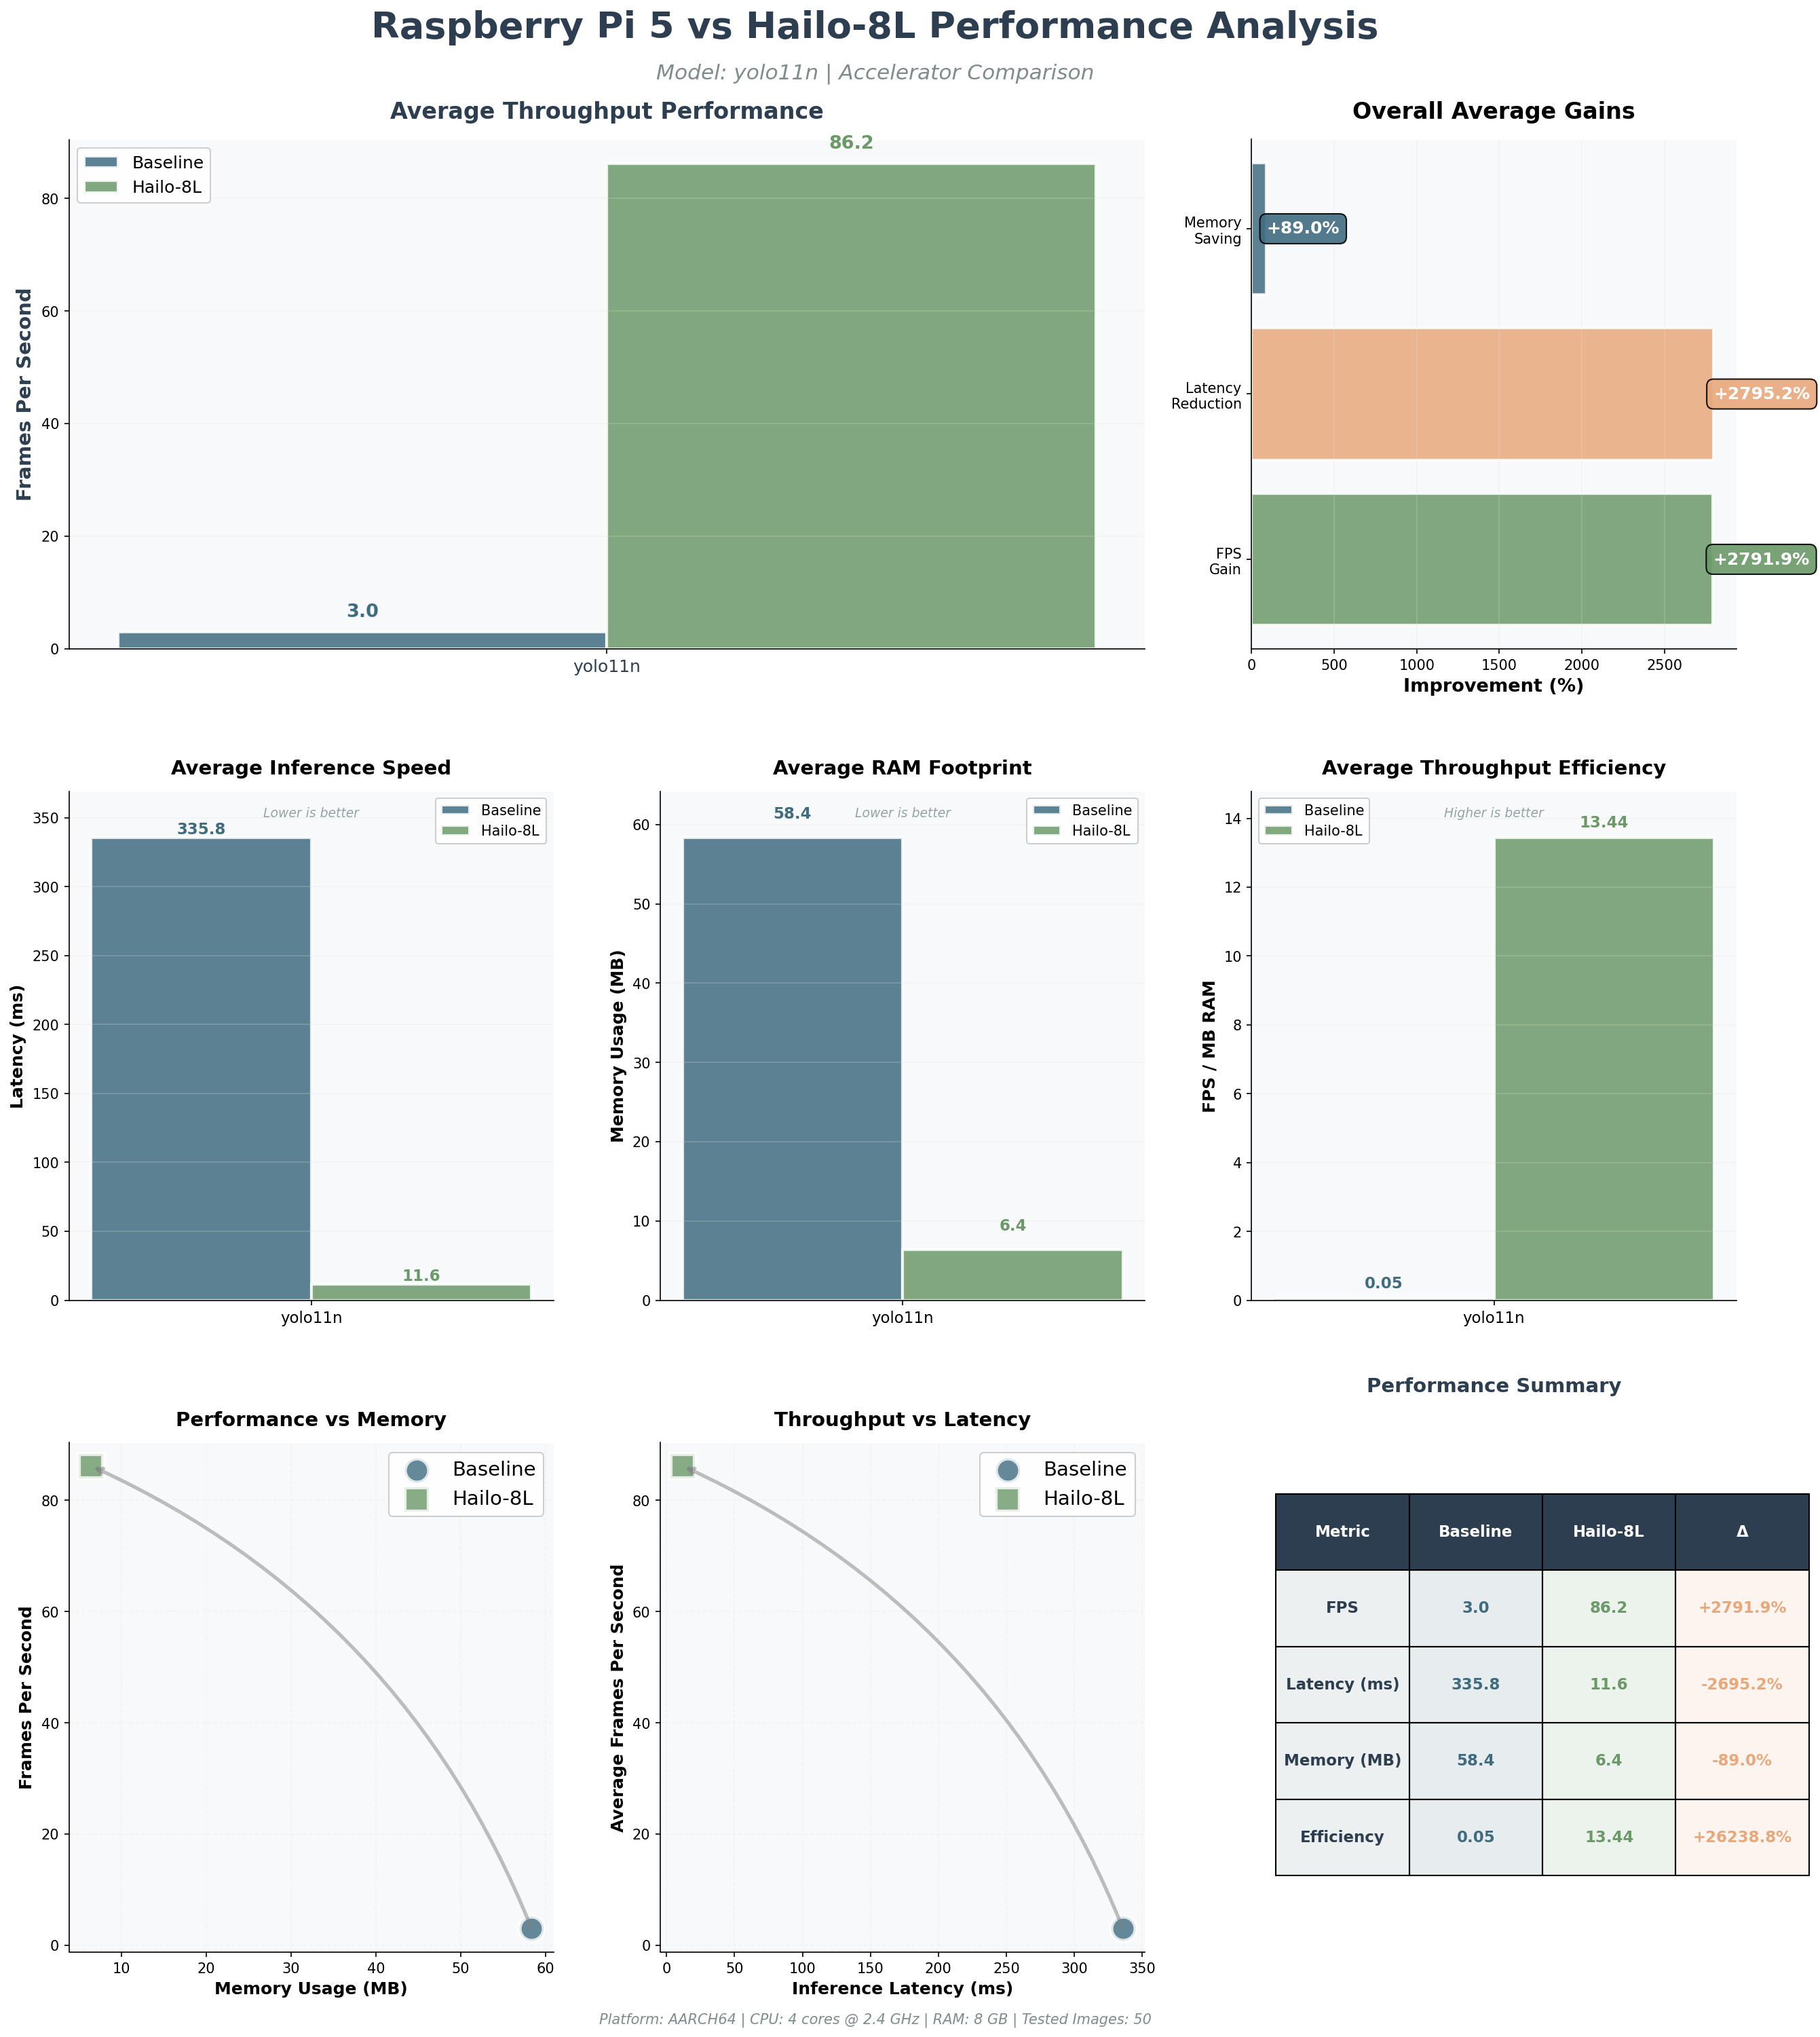

In [72]:
# 🎨 Palette personalizzata
colors = {
    "base": "#406c80",      # blu
    "hailo": "#6B9968",     # verde
    "accent": "#E8A87C",    # arancione chiaro
    "grid": "#e0e0e0",      # grigio chiaro
    "text": "#2c3e50",      # grigio scuro
    "bg": "#f8f9fa"         # sfondo
}

# 🔹 Modelli comuni tra df e df_hailo
common_models = set(df['modello']).intersection(set(df_hailo['modello']))
df_common = df[df['modello'].isin(common_models)].copy()
df_hailo_common = df_hailo[df_hailo['modello'].isin(common_models)].copy()

# Ordina per nome modello per consistenza
df_common = df_common.sort_values('modello').reset_index(drop=True)
df_hailo_common = df_hailo_common.sort_values('modello').reset_index(drop=True)

# ==================== PREPARAZIONE DATI ====================

# 🔹 Metriche chiave per confronto diretto
df_comparison = pd.DataFrame({
    'modello': df_common['modello'].values,
    'fps_base': df_common['fps'].values,
    'fps_hailo': df_hailo_common['fps'].values,
    'latency_base': df_common['inference_speed_ms'].values,
    'latency_hailo': df_hailo_common['inference_speed_ms'].values,
    'memory_base': df_common['memoria_utilizzata_mb'].values,
    'memory_hailo': df_hailo_common['memoria_utilizzata_mb'].values,
})

# 🔹 Speedup percentuali
df_comparison['speedup_fps'] = ((df_comparison['fps_hailo'] / df_comparison['fps_base']) - 1) * 100
df_comparison['speedup_latency'] = ((df_comparison['latency_base'] / df_comparison['latency_hailo']) - 1) * 100
df_comparison['memory_reduction'] = ((df_comparison['memory_base'] - df_comparison['memory_hailo']) / df_comparison['memory_base']) * 100

# 🔹 Efficienze normalizzate
df_comparison['throughput_per_mb_base'] = df_comparison['fps_base'] / df_comparison['memory_base']
df_comparison['throughput_per_mb_hailo'] = df_comparison['fps_hailo'] / df_comparison['memory_hailo']
df_comparison['efficiency_gain'] = ((df_comparison['throughput_per_mb_hailo'] / df_comparison['throughput_per_mb_base']) - 1) * 100

# ==================== SETUP GRAFICO ====================

fig = plt.figure(figsize=(18, 20))
fig.patch.set_facecolor('white')

# Griglia 3x3 ottimizzata
gs = fig.add_gridspec(3, 3, hspace=0.28, wspace=0.22, 
                      left=0.06, right=0.97, top=0.94, bottom=0.05)

# Titolo principale
fig.text(0.5, 0.99, 'Raspberry Pi 5 vs Hailo-8L Performance Analysis', 
         ha='center', fontsize=26, fontweight='bold', color=colors['text'])
fig.text(0.5, 0.97, f"Model: {df_comparison['modello'].iloc[0]} | Accelerator Comparison", 
         ha='center', fontsize=15, style='italic', color='#7f8c8d')

# ==================== RIGA 1: METRICHE PRIMARIE ====================

# 📊 1.1 - FPS Comparison (Più grande)
ax1 = fig.add_subplot(gs[0, :2])
x = np.arange(len(df_comparison))
width = 0.25

bars_base = ax1.bar(x - width/2, df_comparison['fps_base'], width, 
                    label='Baseline', color=colors['base'], alpha=0.85, 
                    edgecolor='white', linewidth=2)
bars_hailo = ax1.bar(x + width/2, df_comparison['fps_hailo'], width,
                     label='Hailo-8L', color=colors['hailo'], alpha=0.85,
                     edgecolor='white', linewidth=2)

# Etichette valori
for bars in [bars_base, bars_hailo]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{height:.1f}', ha='center', va='bottom',
                fontsize=13, fontweight='bold', 
                color=colors['base'] if bars == bars_base else colors['hailo'])

ax1.set_ylabel('Frames Per Second', fontsize=14, fontweight='600', color=colors['text'])
ax1.set_title('Average Throughput Performance', fontsize=16, fontweight='bold', pad=15, color=colors['text'])
ax1.set_xticks(x)
ax1.set_xticklabels(df_comparison['modello'], fontsize=12, color=colors['text'])
ax1.legend(fontsize=12, framealpha=0.95, loc='upper left')
ax1.grid(True, alpha=0.25, axis='y', color=colors['grid'])
ax1.set_facecolor(colors['bg'])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# 📊 1.2 - Performance Gains
ax2 = fig.add_subplot(gs[0, 2])
metrics = ['FPS\nGain', 'Latency\nReduction', 'Memory\nSaving']
values = [
    df_comparison['speedup_fps'].iloc[0],
    df_comparison['speedup_latency'].iloc[0],
    df_comparison['memory_reduction'].iloc[0]
]
bar_colors = [colors['hailo'], colors['accent'], colors['base']]

bars = ax2.barh(metrics, values, color=bar_colors, alpha=0.85,
                edgecolor='white', linewidth=2)

for i, (bar, val) in enumerate(zip(bars, values)):
    ax2.text(val + 2, bar.get_y() + bar.get_height()/2,
            f'+{val:.1f}%', va='center', ha='left',
            fontsize=12, fontweight='bold', color='white',
            bbox=dict(boxstyle='round,pad=0.4', facecolor=bar_colors[i], alpha=0.9))

ax2.set_xlabel('Improvement (%)', fontsize=13, fontweight='600')
ax2.set_title('Overall Average Gains', fontsize=16, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.25, axis='x', color=colors['grid'])
ax2.set_facecolor(colors['bg'])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# ==================== RIGA 2: CONFRONTO DETTAGLIATO ====================

# 📊 2.1 - Inference Latency
ax3 = fig.add_subplot(gs[1, 0])
x = np.arange(len(df_comparison))
width = 0.25

bars_base = ax3.bar(x - width/2, df_comparison['latency_base'], width,
                    label='Baseline', color=colors['base'], alpha=0.85,
                    edgecolor='white', linewidth=2)
bars_hailo = ax3.bar(x + width/2, df_comparison['latency_hailo'], width,
                     label='Hailo-8L', color=colors['hailo'], alpha=0.85,
                     edgecolor='white', linewidth=2)

for bars in [bars_base, bars_hailo]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.3,
                f'{height:.1f}', ha='center', va='bottom',
                fontsize=11, fontweight='bold',
                color=colors['base'] if bars == bars_base else colors['hailo'])

ax3.set_ylabel('Latency (ms)', fontsize=12, fontweight='600')
ax3.set_title('Average Inference Speed', fontsize=14, fontweight='bold', pad=12)
ax3.set_ylim((0, max(df_comparison['latency_base'].max(), 
                 df_comparison['latency_hailo'].max()) * 1.1))
ax3.set_xticks(x)
ax3.set_xticklabels(df_comparison['modello'], fontsize=11)
ax3.legend(fontsize=10, framealpha=0.95)
ax3.grid(True, alpha=0.25, axis='y', color=colors['grid'])
ax3.set_facecolor(colors['bg'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.text(0.5, 0.95, 'Lower is better', transform=ax3.transAxes,
        ha='center', fontsize=9, style='italic', color='#95a5a6')

# 📊 2.2 - Memory Usage
ax4 = fig.add_subplot(gs[1, 1])
x = np.arange(len(df_comparison))
width = 0.25

bars_base = ax4.bar(x - width/2, df_comparison['memory_base'], width,
                    label='Baseline', color=colors['base'], alpha=0.85,
                    edgecolor='white', linewidth=2)
bars_hailo = ax4.bar(x + width/2, df_comparison['memory_hailo'], width,
                     label='Hailo-8L', color=colors['hailo'], alpha=0.85,
                     edgecolor='white', linewidth=2)

for bars in [bars_base, bars_hailo]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{height:.1f}', ha='center', va='bottom',
                fontsize=11, fontweight='bold',
                color=colors['base'] if bars == bars_base else colors['hailo'])

ax4.set_ylabel('Memory Usage (MB)', fontsize=12, fontweight='600')
ax4.set_title('Average RAM Footprint', fontsize=14, fontweight='bold', pad=12)
ax4.set_ylim((0, max(df_comparison['memory_base'].max(), 
                     df_comparison['memory_hailo'].max()) * 1.1))
ax4.set_xticks(x)
ax4.set_xticklabels(df_comparison['modello'], fontsize=11)
ax4.legend(fontsize=10, framealpha=0.95)
ax4.grid(True, alpha=0.25, axis='y', color=colors['grid'])
ax4.set_facecolor(colors['bg'])
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.text(0.5, 0.95, 'Lower is better', transform=ax4.transAxes,
        ha='center', fontsize=9, style='italic', color='#95a5a6')

# 📊 2.3 - Efficiency Metric
ax5 = fig.add_subplot(gs[1, 2])
x = np.arange(len(df_comparison))
width = 0.25

bars_base = ax5.bar(x - width/2, df_comparison['throughput_per_mb_base'], width,
                    label='Baseline', color=colors['base'], alpha=0.85,
                    edgecolor='white', linewidth=2)
bars_hailo = ax5.bar(x + width/2, df_comparison['throughput_per_mb_hailo'], width,
                     label='Hailo-8L', color=colors['hailo'], alpha=0.85,
                     edgecolor='white', linewidth=2)

for bars in [bars_base, bars_hailo]:
    for bar in bars:
        height = bar.get_height()
        ax5.text(bar.get_x() + bar.get_width()/2., height + 0.2,
                f'{height:.2f}', ha='center', va='bottom',
                fontsize=11, fontweight='bold',
                color=colors['base'] if bars == bars_base else colors['hailo'])

ax5.set_ylabel('FPS / MB RAM', fontsize=12, fontweight='600')
ax5.set_title('Average Throughput Efficiency', fontsize=14, fontweight='bold', pad=12)
ax5.set_ylim((0, max(df_comparison['throughput_per_mb_base'].max(), 
                     df_comparison['throughput_per_mb_hailo'].max()) * 1.1))
ax5.set_xticks(x)
ax5.set_xticklabels(df_comparison['modello'], fontsize=11)
ax5.legend(fontsize=10, framealpha=0.95)
ax5.grid(True, alpha=0.25, axis='y', color=colors['grid'])
ax5.set_facecolor(colors['bg'])
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.text(0.5, 0.95, 'Higher is better', transform=ax5.transAxes,
        ha='center', fontsize=9, style='italic', color='#95a5a6')

# ==================== RIGA 3: ANALISI TRADE-OFF ====================

# 📊 3.1 - FPS vs Memory Trade-off
ax6 = fig.add_subplot(gs[2, 0])
ax6.scatter(df_comparison['memory_base'], df_comparison['fps_base'],
           s=300, color=colors['base'], alpha=0.8, edgecolors='white',
           linewidth=3, label='Baseline', marker='o', zorder=3)
ax6.scatter(df_comparison['memory_hailo'], df_comparison['fps_hailo'],
           s=300, color=colors['hailo'], alpha=0.8, edgecolors='white',
           linewidth=3, label='Hailo-8L', marker='s', zorder=3)

# Linea di connessione
for i in range(len(df_comparison)):
    ax6.annotate('', xy=(df_comparison['memory_hailo'].iloc[i], df_comparison['fps_hailo'].iloc[i]),
                xytext=(df_comparison['memory_base'].iloc[i], df_comparison['fps_base'].iloc[i]),
                arrowprops=dict(arrowstyle='->', color='gray', alpha=0.5,
                              lw=2.5, connectionstyle="arc3,rad=0.2"))

ax6.set_xlabel('Memory Usage (MB)', fontsize=12, fontweight='600')
ax6.set_ylabel('Frames Per Second', fontsize=12, fontweight='600')
ax6.set_title('Performance vs Memory', fontsize=14, fontweight='bold', pad=12)
ax6.legend(fontsize=14, framealpha=0.95, loc='best')
ax6.grid(True, alpha=0.25, linestyle='--', color=colors['grid'])
ax6.set_facecolor(colors['bg'])
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)

# 📊 3.2 - FPS vs Latency Trade-off
ax7 = fig.add_subplot(gs[2, 1])
ax7.scatter(df_comparison['latency_base'], df_comparison['fps_base'],
           s=300, color=colors['base'], alpha=0.8, edgecolors='white',
           linewidth=3, label='Baseline', marker='o', zorder=3)
ax7.scatter(df_comparison['latency_hailo'], df_comparison['fps_hailo'],
           s=300, color=colors['hailo'], alpha=0.8, edgecolors='white',
           linewidth=3, label='Hailo-8L', marker='s', zorder=3)

# Linea di connessione
for i in range(len(df_comparison)):
    ax7.annotate('', xy=(df_comparison['latency_hailo'].iloc[i], df_comparison['fps_hailo'].iloc[i]),
                xytext=(df_comparison['latency_base'].iloc[i], df_comparison['fps_base'].iloc[i]),
                arrowprops=dict(arrowstyle='->', color='gray', alpha=0.5,
                              lw=2.5, connectionstyle="arc3,rad=0.2"))

ax7.set_xlabel('Inference Latency (ms)', fontsize=12, fontweight='600')
ax7.set_ylabel('Average Frames Per Second', fontsize=12, fontweight='600')
ax7.set_title('Throughput vs Latency', fontsize=14, fontweight='bold', pad=12)
ax7.legend(fontsize=14, framealpha=0.95, loc='best')
ax7.grid(True, alpha=0.25, linestyle='--', color=colors['grid'])
ax7.set_facecolor(colors['bg'])
ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)

# 📊 3.3 - Summary Statistics
ax8 = fig.add_subplot(gs[2, 2])
ax8.axis('off')

# Crea una tabella riassuntiva elegante
summary_data = [
    ['Metric', 'Baseline', 'Hailo-8L', 'Δ'],
    ['FPS', f"{df_comparison['fps_base'].iloc[0]:.1f}", 
     f"{df_comparison['fps_hailo'].iloc[0]:.1f}",
     f"+{df_comparison['speedup_fps'].iloc[0]:.1f}%"],
    ['Latency (ms)', f"{df_comparison['latency_base'].iloc[0]:.1f}",
     f"{df_comparison['latency_hailo'].iloc[0]:.1f}",
     f"{100-df_comparison['speedup_latency'].iloc[0]:.1f}%"],
    ['Memory (MB)', f"{df_comparison['memory_base'].iloc[0]:.1f}",
     f"{df_comparison['memory_hailo'].iloc[0]:.1f}",
     f"-{df_comparison['memory_reduction'].iloc[0]:.1f}%"],
    ['Efficiency', f"{df_comparison['throughput_per_mb_base'].iloc[0]:.2f}",
     f"{df_comparison['throughput_per_mb_hailo'].iloc[0]:.2f}",
     f"+{df_comparison['efficiency_gain'].iloc[0]:.1f}%"],
]

table = ax8.table(cellText=summary_data, cellLoc='center', loc='center',
                 bbox=[0.05, 0.15, 1.1, 0.75])

table.auto_set_font_size(False)
table.set_fontsize(11)

# Stile celle
for i, row in enumerate(summary_data):
    for j, cell in enumerate(row):
        cell_obj = table[(i, j)]
        if i == 0:  # Header
            cell_obj.set_facecolor(colors['text'])
            cell_obj.set_text_props(weight='bold', color='white')
        else:
            if j == 0:  # Metric names
                cell_obj.set_facecolor('#ecf0f1')
                cell_obj.set_text_props(weight='600', color=colors['text'])
            elif j == 1:  # Baseline
                cell_obj.set_facecolor(colors['base'] + '20')
                cell_obj.set_text_props(color=colors['base'], weight='bold')
            elif j == 2:  # Hailo
                cell_obj.set_facecolor(colors['hailo'] + '20')
                cell_obj.set_text_props(color=colors['hailo'], weight='bold')
            else:  # Delta
                cell_obj.set_facecolor(colors['accent'] + '20')
                cell_obj.set_text_props(color=colors['accent'], weight='bold')

ax8.text(0.5, 1.1, 'Performance Summary', transform=ax8.transAxes,
        ha='center', fontsize=14, fontweight='bold', color=colors['text'])

# ==================== FOOTER ====================
fig.text(0.5, 0.015, 
         f"Platform: {df_hailo_common['platform'].iloc[0].upper()} | "
         f"CPU: {df_hailo_common['cpu_count'].iloc[0]} cores @ {df_hailo_common['cpu_freq_ghz'].iloc[0]} GHz | "
         f"RAM: 8 GB | "
         f"Tested Images: {df_hailo_common['immagini_testate'].iloc[0]}",
         ha='center', fontsize=10, style='italic', color='#7f8c8d')

plt.savefig('model_performance_analysis.png', dpi=300, 
            bbox_inches='tight', facecolor='white', edgecolor='none')

print("✅ Grafico ottimizzato generato con successo!")
print("📊 File salvato: model_performance_analysis.png")
print(f"\n📈 Key Insights:")
print(f"  • FPS Improvement: +{df_comparison['speedup_fps'].iloc[0]:.1f}%")
print(f"  • Latency Reduction: +{df_comparison['speedup_latency'].iloc[0]:.1f}%")
print(f"  • Memory Saving: -{df_comparison['memory_reduction'].iloc[0]:.1f}%")
print(f"  • Efficiency Gain: +{df_comparison['efficiency_gain'].iloc[0]:.1f}%")

## Summary

### Generated Files

This notebook generates the following visualization files:

1. **model_performance_comparison.png** - FPS and inference time comparison
2. **model_resources_comparison.png** - Model size and memory usage
3. **model_complexity_comparison.png** - Parameters and GFLOPS comparison
4. **model_efficiency_comparison.png** - Efficiency analysis (FPS per resource unit)
5. **model_radar_comparison.png** - Multi-dimensional radar chart (if ≤5 models)
6. **model_complete_benchmark.png** - Complete overview with all metrics

### Usage Instructions

1. **First**: Run the testing cells to generate `results.csv`
2. **Then**: Execute each visualization cell individually to see specific comparisons
3. **Results**: All plots are displayed in the notebook AND saved as high-quality PNG files

### Key Metrics Analyzed

- **Performance**: FPS (Frames Per Second) and inference time
- **Resource Usage**: Model size (MB) and memory consumption (MB)
- **Complexity**: Number of parameters and GFLOPS
- **Efficiency**: Performance per resource unit ratios
- **Multi-dimensional**: Radar chart showing overall balance

Each visualization provides both visual insights and detailed rankings to help you choose the best model for your specific requirements.# Model Testing and Analysis Notebook

This notebook contains scripts for testing different object detection models and analyzing their performance results.